# 1. Visualisierungen

# 1.1 Dataframe

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from database.bottle_dataframe import load_bottle_dataframe

df = load_bottle_dataframe()

print(df)


    bottle_id  final_weight is_cracked  \
0    49633160     21.875852          0   
1    49633166     20.215037          0   
2    49633164     21.599182          0   
3    49633162     21.366188          0   
4    49633168     22.345867          0   
..        ...           ...        ...   
252  49633856     20.574662          0   
253  49633858     22.050358          0   
254  49633860     21.574134          0   
255  49633862           NaN       None   
256  49633864           NaN       None   

                                      drop_oscillation  red_fill_level_grams  \
0    [-0.0000000000, 0.0480057948, 0.2496636050, -0...                   NaN   
1    [0.0000000000, 0.6661762800, 1.1608894114, 1.5...            212.326459   
2    [0.0000000000, 0.6878617246, 1.3448030234, 1.9...                   NaN   
3    [0.0000000000, 0.7095348537, 0.9771485884, 1.8...                   NaN   
4    [0.0000000000, -0.0232779078, 0.0924542918, -0...            211.123260   
..             

## 1.2 Endgewicht

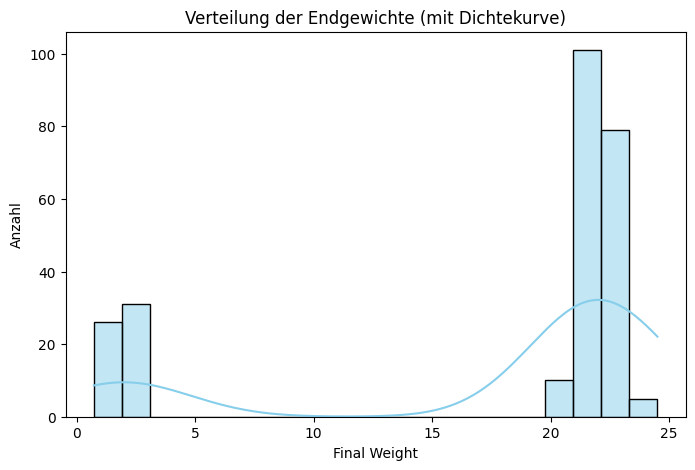

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df["final_weight"].dropna(), bins=20, kde=True, color="skyblue")
plt.xlabel("Final Weight")
plt.ylabel("Anzahl")
plt.title("Verteilung der Endgewichte (mit Dichtekurve)")
plt.show()

# 1.2 Dispencer-Füllstand

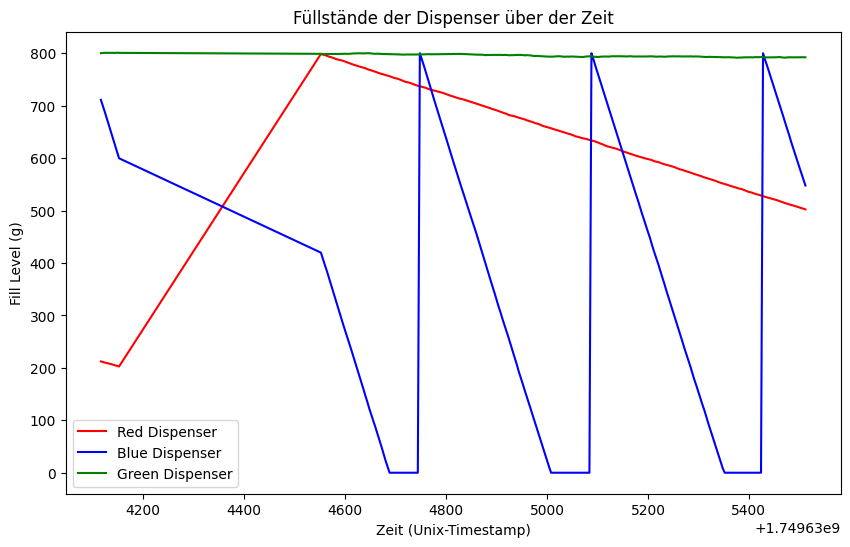

In [10]:
plt.figure(figsize=(10, 6))

color_map = {"red": "red", "blue": "blue", "green": "green"}

for color in ["red", "blue", "green"]:
    mask = df[f"{color}_fill_level_grams"].notnull() & df[f"{color}_time"].notnull()
    plot_df = df.loc[mask, [f"{color}_time", f"{color}_fill_level_grams"]].sort_values(f"{color}_time")
    sns.lineplot(
        x=plot_df[f"{color}_time"],
        y=plot_df[f"{color}_fill_level_grams"],
        label=f"{color.capitalize()} Dispenser",
        color=color_map[color]
    )

plt.xlabel("Zeit (Unix-Timestamp)")
plt.ylabel("Fill Level (g)")
plt.title("Füllstände der Dispenser über der Zeit")
plt.legend()
plt.show()

# 1.3 Zustand der Flaschen

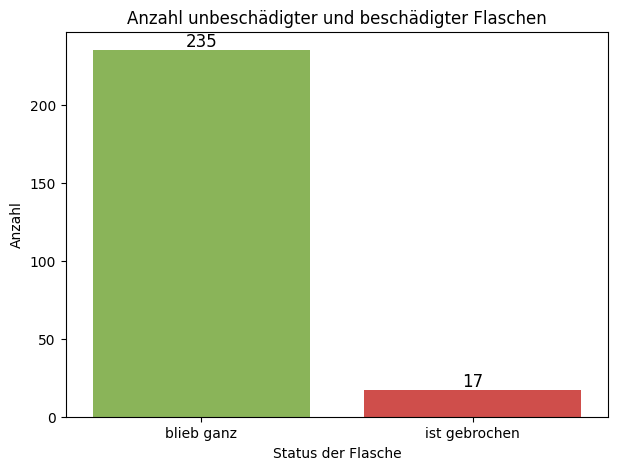

In [11]:
plt.figure(figsize=(7, 5))
label_map = {"0": "blieb ganz", "1": "ist gebrochen"}
bar_colors = ["#8bc34a", "#e53935"]

# Die Farben direkt mit hue zuweisen
ax = sns.countplot(
    x=df["is_cracked"].map(label_map),
    hue=df["is_cracked"].map(label_map),
    palette=bar_colors,
    legend=False
)
plt.xlabel("Status der Flasche")
plt.ylabel("Anzahl")
plt.title("Anzahl unbeschädigter und beschädigter Flaschen")

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

plt.show()

# 1.4 Vibrationsdaten einzelner Flasche

In [12]:

bottle_id = "49633160"
row = df[df["bottle_id"] == bottle_id]

if not row.empty and row.iloc[0]["drop_oscillation"] is not None:
    vibration = row.iloc[0]["drop_oscillation"]
    if isinstance(vibration, str):
        import ast
        vibration = ast.literal_eval(vibration)
    
    vibration = [float(v) for v in vibration]
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        y=vibration,
        mode='lines+markers',
        line=dict(color='royalblue', width=2),
        opacity=0.7,
        name="Vibration"
    ))
    fig.add_trace(go.Scatter(
        y=[0]*len(vibration),
        mode='lines',
        line=dict(color='black', width=1, dash='dash'),
        name="Nulllinie"
    ))
    fig.update_layout(
        title=f"Vibrationsdaten für Flasche {bottle_id}",
        xaxis_title="Messpunkt",
        yaxis_title="Vibration",
        template="plotly"
    )
    fig.show()
else:
    print("Keine Vibrationsdaten für diese Flasche gefunden.")